### sample_redmagic

Drawing a population of redmagic galaxies which matches the distribution of lens candidates in $R_{{\rm eff},r}-z_{\rm{phot}}$ space.

In [1]:
# math, array manipulation, etc.
import numpy as np

import os
import sys
print(sys.version)

# timing
from timeit import default_timer
from tqdm import tqdm

import pandas as pd

import astropy.io.fits as fits
from astropy.table import Table                    # Table data structure

# plots
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns

3.10.4 (main, Mar 31 2022, 03:38:35) [Clang 12.0.0 ]


/Users/aidan/opt/anaconda3/envs/gal-gal-sel/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
sys.path.append('/Users/aidan/Desktop/sl_project/galaxy-galaxy-sel/')

from aidan_utils import plot_prettier, get_fits_files

# only need to run once
plot_prettier()


In [77]:
path = '/Users/aidan/Desktop/sl_project/production/'
results_filename = path + 'lens_results.csv'

results = pd.read_csv(results_filename)

zlens = results['photo_z']
refflens = results['halflightrad_r_50']

max_ind = np.argmax(reff_r)
#reff_r = np.delete(np.array(reff_r), max_ind)
#photo_z = np.delete(np.array(photo_z), max_ind)

print(results['sersicindex_r_16'][max_ind])
print(results['sersicindex_r_50'][max_ind])
print(results['sersicindex_r_84'][max_ind])

print(max_ind)


0.890972931320835
0.9331833098991992
0.9635123986559208
68


(0.3, 9.5)

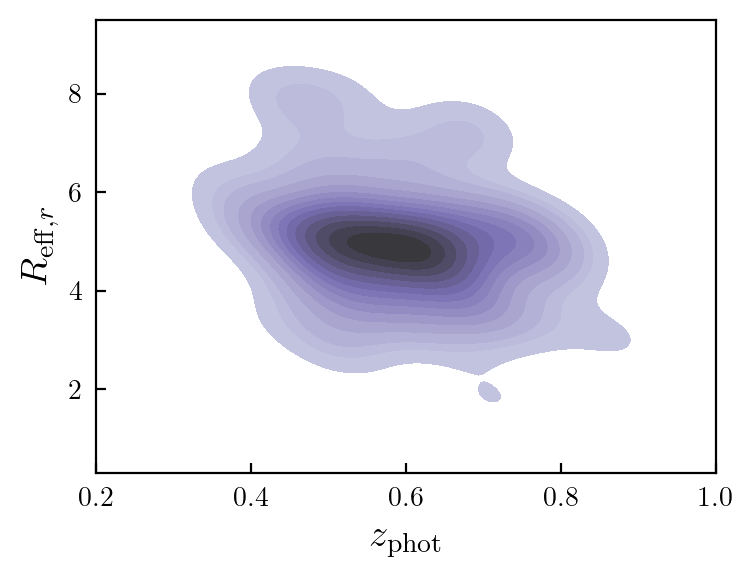

In [4]:

fig, ax = plt.subplots(1,1, figsize=(4,3))

test = sns.kdeplot(x=zlens, y=refflens
                   , ax=ax
                   , cmap="Purples_d"
                   #, cbar=True
                   , shade=True
                   , levels=15
                  )
#test = ax.scatter(photo_z, reff_r)
ax.set_xlabel(r'$z_{\rm phot}$', fontsize=14)
ax.set_ylabel(r'$R_{{\rm eff}, r}$', fontsize=14)
ax.set_xlim(0.2,1)
ax.set_ylim(0.3, 9.5)


In [7]:
# let's test with scikit-learn and scipy kernel density estimation
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde

data = np.array([zlens, refflens])
kde = gaussian_kde(data)

#data = np.array([photo_z, reff_r]).T
#kde = KernelDensity(bandwidth = 0.05).fit(data)

# Create a meshgrid, which has cells whose values are the (x,y) location at each cell
z = np.linspace(0, 1.5, 1000)
rr = np.linspace(0, 15, 1000)
zs, rrs = np.meshgrid(z, rr)

# Pair the x locations with y locations

In [8]:
# if I have an array of z_phot and R_eff,r values from redmagic, then I can use the evaluation below

# evaluate

zrrs = np.vstack((zs.ravel(), rrs.ravel()))
f = kde.evaluate(zrrs)

#zrrs = np.vstack((zs.ravel(), rrs.ravel())).T
#f = np.exp(kde.score_samples(zrrs))

# then, I can use np.random.choice to draw the redmagic population
# get all redmagic catalog entries from NOIRLab matching tool


(0.3, 9.5)

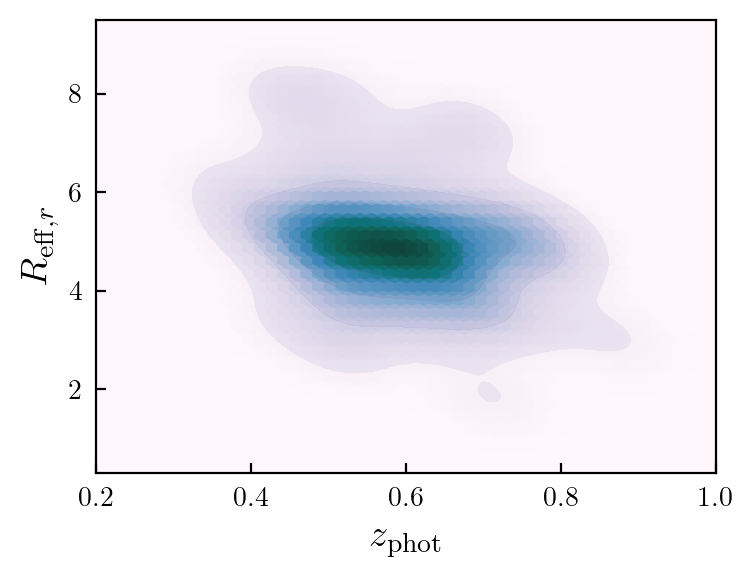

In [9]:

fig, ax = plt.subplots(1,1, figsize=(4,3))

ax.hexbin(zrrs[0], zrrs[1], C=f
          , cmap='PuBuGn', alpha=1
          #, cbar=True
         )

test = sns.kdeplot(x=zlens, y=refflens
                   , ax=ax
                   , cmap="Purples_d", alpha=0.2
                   #, cbar=True
                   , shade=True
                   , levels=5
                  )

ax.set_xlabel(r'$z_{\rm phot}$', fontsize=14)
ax.set_ylabel(r'$R_{{\rm eff}, r}$', fontsize=14)
ax.set_xlim(0.2,1)
ax.set_ylim(0.3, 9.5)

# use kpc instead! astropy.cosmology
# take like 500k or something instead of loading the whole 2.7 million

#### Matching to existing redMaGiC sample I have

In [73]:
from astropy.coordinates import SkyCoord
from astropy import units as u

from astropy.io import ascii as asc
from astropy.table import vstack

rmr_path = '/Users/aidan/Desktop/sl_project/img_cutouts/redmagic/rband_dr2/'
rmg_path = '/Users/aidan/Desktop/sl_project/img_cutouts/redmagic/gband_dr2/'

files_r = get_fits_files(rmr_path)
files_g = get_fits_files(rmg_path)

csv_num_lst = [3,4,5,8,9,10,11,13,14] # the first one is 2

rm10k_table = asc.read('/Users/aidan/Desktop/sl_project/DESaccess_CSVs/redmagic/redmagic_r_2.csv', format='csv')

for i in csv_num_lst:

    rtable_i = asc.read('/Users/aidan/Desktop/sl_project/DESaccess_CSVs/redmagic/redmagic_r_{}.csv'.format(i), format='csv')
    
    rm10k_table = vstack((rm10k_table, rtable_i))
    
# get the table from the catalog
#redmagic = read_fits_table('y3a2_gold2.2.1_redmagic_highdens.fits')

# get coords
redm_coords = SkyCoord(rm10k_table['RA']*u.deg, rm10k_table['DEC']*u.deg, frame='icrs')


In [418]:
rad_file = '/Users/aidan/Desktop/sl_project/catalogs/redmagic_my10k_dr2.csv'
rad_table = pd.read_csv(rad_file)

rads = rad_table['flux_radius_r']
rad_ra = rad_table['t1_ra']
rad_dec = rad_table['t1_dec']

rad_coords = SkyCoord(rad_ra*u.deg, rad_dec*u.deg, frame='icrs')

# get the table from the catalog
redmagic1 = Table(fits.open('/Users/aidan/Desktop/sl_project/y3a2_gold2.2.1_redmagic_highlum_highz.fits')[1].data)
redmagic2 = Table(fits.open('/Users/aidan/Desktop/sl_project/y3a2_gold2.2.1_redmagic_highdens.fits')[1].data)

redmagic = vstack((redmagic1, redmagic2))

ind500k = np.random.randint(0, len(redmagic), size=500000)

redmagic = redmagic[ind500k]

rm_zs = redmagic['zredmagic']
rm_ra = redmagic['ra']
rm_dec = redmagic['dec']

rm_coords = SkyCoord(rm_ra*u.deg, rm_dec*u.deg, frame='icrs')


In [103]:
rad_inds, z_inds

(array([4763, 3079, 6351, ..., 7343, 3831, 6374]),
 array([1299543,  491294,  816932, ...,  704166, 1261237,  743662]))

In [113]:
rad10k = np.array(rads[rad_inds])
z10k = np.array(rm_zs[z_inds])

f10k = kde.evaluate([z10k, rad10k])


(0.3, 9.5)

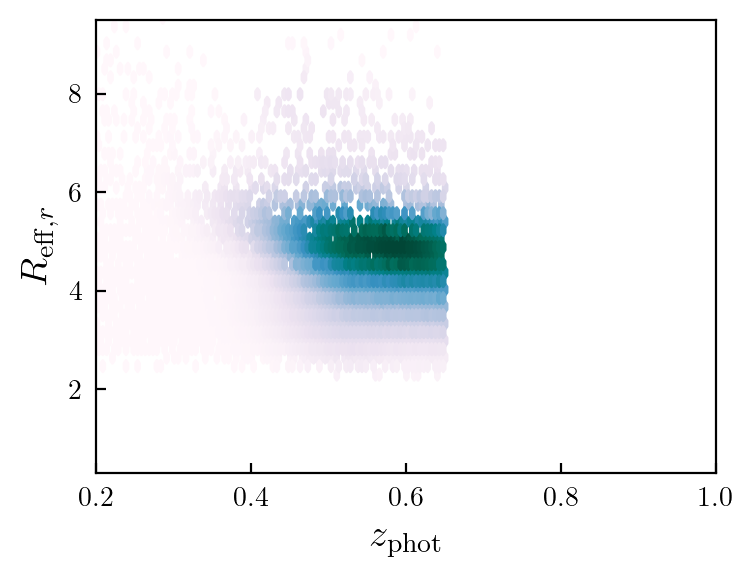

In [115]:

fig, ax = plt.subplots(1,1, figsize=(4,3))

ax.hexbin(z10k, rad10k, C=f10k
          , cmap='PuBuGn', alpha=1
          #, cbar=True
         )

ax.set_xlabel(r'$z_{\rm phot}$', fontsize=14)
ax.set_ylabel(r'$R_{{\rm eff}, r}$', fontsize=14)
ax.set_xlim(0.2,1)
ax.set_ylim(0.3, 9.5)


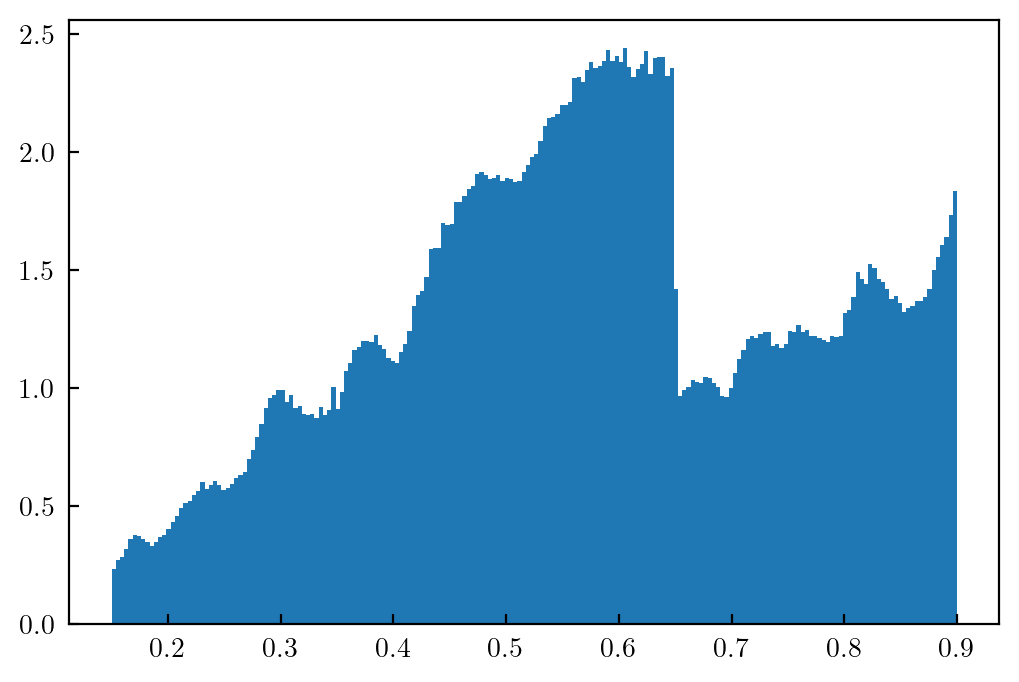

In [192]:
plt.hist(redmagic['zredmagic'], bins = 200, density=True)
plt.show()

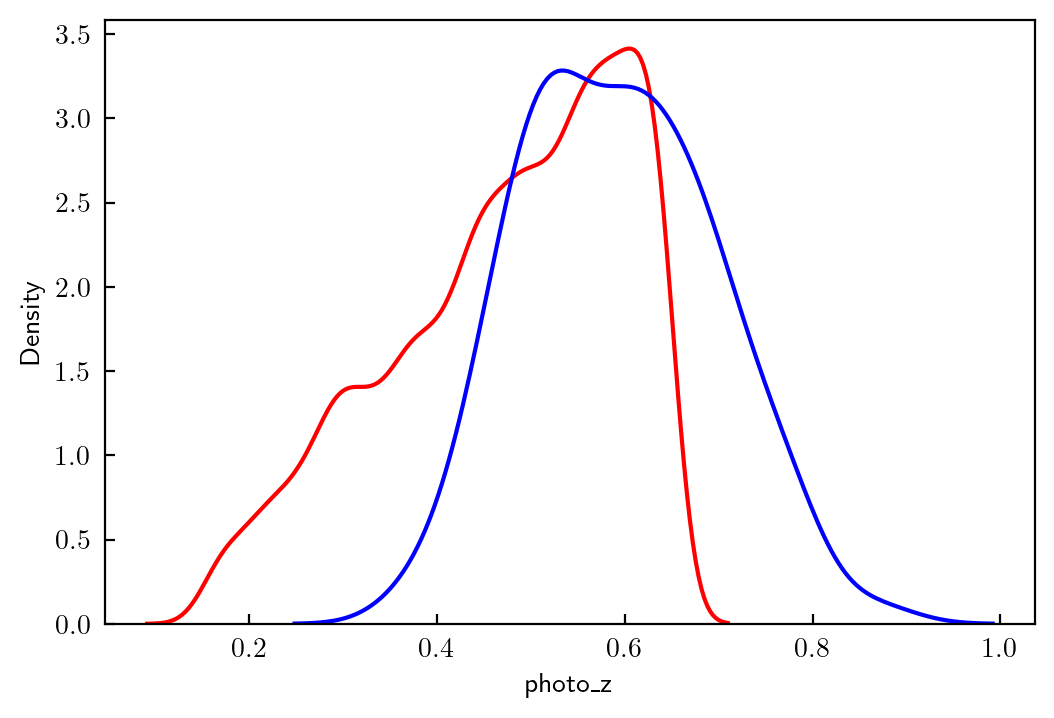

In [190]:
sns.kdeplot(z10k, color='red')
sns.kdeplot(photo_z, color='blue')
#plt.hist(photo_z, color='orange', histtype='step', bins = 15, density=True)
#plt.xlim(0,1)
plt.show()

Alright, so basically we should combine the high density and the high redshift redMaGiC samples and draw our parent population from the combination of the two. This is not something I did previously, and so my first parent population cannot capture the same distribution in $R_{{\rm eff},r}-z_{\rm{phot}}$ space as the lens sample. The maximum redshift in the high density sample is $z \sim 0.65$.

In [227]:
print((np.min(photo_z), np.max(photo_z)))

#ind = ((redmagic['zredmagic'] > 0.3) 
#       & (redmagic['zredmagic'] < 0.89)
#      )
n = 350000
ind = np.random.choice(len(redmagic), n)
test_rm = redmagic[ind]
print((np.min(test_rm['zredmagic']), np.max(test_rm['zredmagic'])))

(0.3700000047683716, 0.8700000047683716)
(0.1500071, 0.8999999)


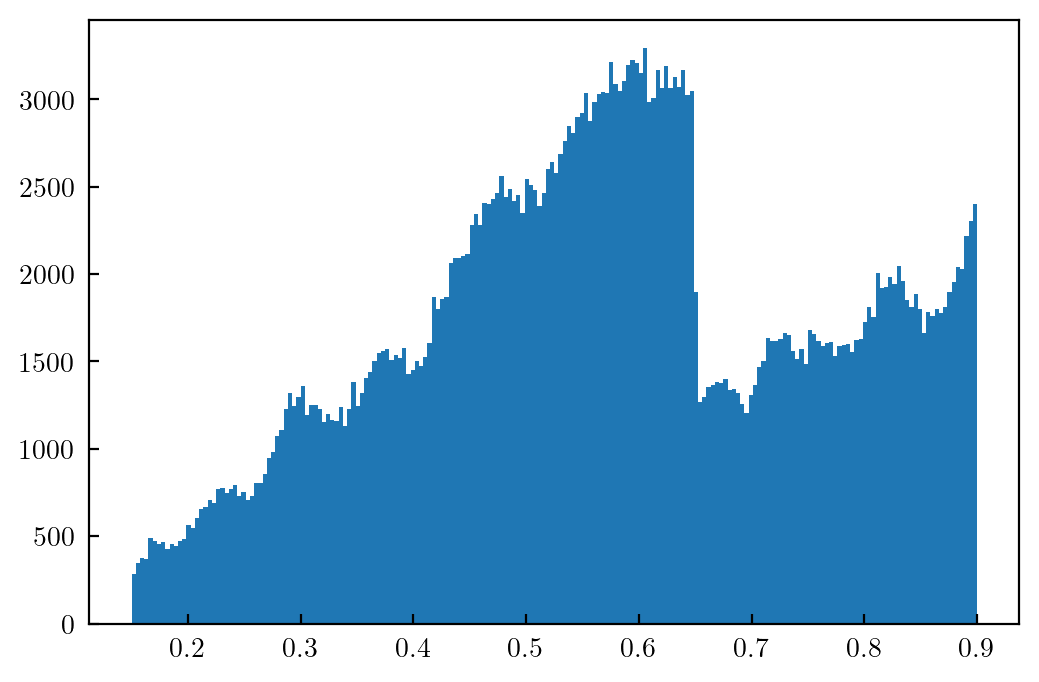

In [370]:
plt.hist(test_rm['zredmagic'], bins = 200, density=False)
plt.show()

In [229]:
test_rm.write('/Users/aidan/Desktop/sl_project/test.csv', delimiter=',', overwrite=True, format='ascii')

### Drawing a redMaGiC Population

The next task is to match this entire table to a DR2 catalog to pair photometric redshifts with half-light radii in $r$-band. Then, we evaluate our kernel density function over the entire catalog and randomly draw a parent population with that evaluation array as a probabilistic weight.

We convert radii into kiloparsecs using a flat $\Lambda \rm{CDM}$ cosmology.

In [80]:
from astropy.cosmology import FlatLambdaCDM
from scipy.stats import gaussian_kde

cosmo = FlatLambdaCDM(H0 = 70, Om0 = 0.3)
pix2arcsec = 0.263

In [83]:
cosmo.arcsec_per_kpc_proper(zlens)

AttributeError: 'Series' object has no attribute 'to'

In [88]:
arcsec2kpc_lens_arr = np.zeros_like(zlens)
for i, z in enumerate(zlens):
    ai = cosmo.arcsec_per_kpc_proper(z)
    arcsec2kpc_lens_arr[i] = ai.value

arcsec2kpc_lens = 1 / arcsec2kpc_lens_arr

reffkpc_lens = refflens * pix2arcsec * arcsec2kpc_lens

data = np.array([zlens, reffkpc_lens])
kde = gaussian_kde(data)

In [89]:
rm_xmatch = Table.read('/Users/aidan/Desktop/sl_project/rmtest_350k.csv')

#z_xmatch = rm_xmatch['t1_zredmagic']
#rad_xmatch = rm_xmatch['flux_radius_r']

# filter out NaNs
#nan_inds = np.isnan(rad_xmatch)
#print(nan_inds)

#rm_xmatch = rm_xmatch[nan_inds]

In [92]:

nonzero = (rm_xmatch['flux_radius_r'] > 0)

z_xmatch = rm_xmatch['t1_zredmagic'][nonzero]

rad_xmatch = rm_xmatch['flux_radius_r'][nonzero]

rmarcsec2kpc_arr = np.zeros_like(z_xmatch)
for i, z in tqdm(enumerate(z_xmatch)):
    ai = cosmo.arcsec_per_kpc_proper(z)
    rmarcsec2kpc_arr[i] = ai.value

rmarcsec2kpc = 1 / rmarcsec2kpc_arr

reffkpc_rm = rad_xmatch * pix2arcsec * rmarcsec2kpc

# are there any nans or infs?

348243it [00:43, 8024.76it/s]


In [93]:
rmind = np.random.randint(0, len(reffkpc_rm), 10000)
rmdata = np.array([z_xmatch, reffkpc_rm])
rmkde = gaussian_kde(rmdata.T[rmind].T)


In [94]:
# evaluate
f_xmatch = kde.evaluate(rmdata)
f_xmatch = f_xmatch / np.sum(f_xmatch)

In [95]:

rmf = rmkde.evaluate(rmdata)
rmf = rmf / np.sum(rmf)

In [96]:
ffinal = f_xmatch / rmf
ffinal[np.isnan(ffinal)] = 0
ffinal = ffinal / np.sum(ffinal)


/var/folders/w0/42nt1p3j6szgcznjn4btwmwm0000gn/T/ipykernel_89900/3527895602.py:1: RuntimeWarning: invalid value encountered in divide
  ffinal = f_xmatch / rmf


In [105]:
rad_xmatch[288740], z_xmatch[288740]

(88.27973, 0.8980750441551208)

(0.3, 25.0)

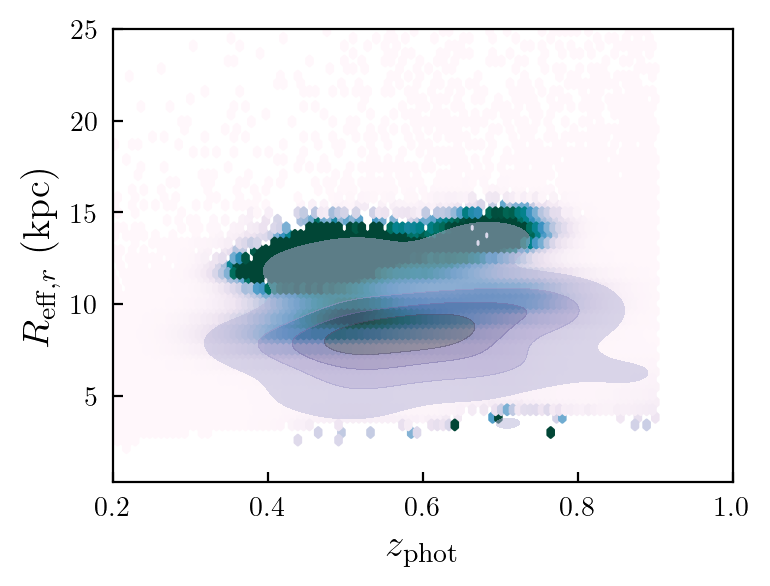

In [112]:
from matplotlib.colors import LogNorm

plot_ind = (rad_xmatch < 25)

fig, ax = plt.subplots(1,1, figsize=(4,3))

ax.hexbin(z_xmatch[plot_ind]
          , reffkpc_rm[plot_ind]
          , C=ffinal[plot_ind]
          , cmap='PuBuGn', alpha=1
          , vmax=3e-5
          #, cbar=True
         )

test = sns.kdeplot(x=photo_z, y=reffkpc_lens
                   , ax=ax
                   , cmap="Purples_d", alpha=0.5
                   #, cbar=True
                   , shade=True
                   , levels=5
                  )

ax.set_xlabel(r'$z_{\rm phot}$', fontsize=14)
ax.set_ylabel(r'$R_{{\rm eff}, r}\ (\rm{kpc})$', fontsize=14)
ax.set_xlim(0.2,1)
ax.set_ylim(0.3, 25)

In [126]:
# draw population randomly
pop_ind = np.random.choice(len(reffkpc_rm), 10000, p=ffinal)

zpop = z_xmatch[pop_ind]
rpop = reffkpc_rm[pop_ind]

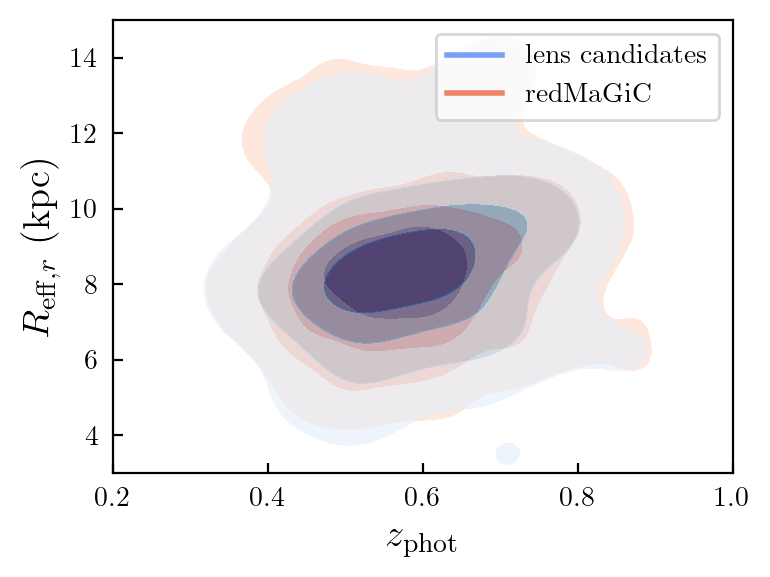

In [149]:
from matplotlib.lines import Line2D

fig, ax = plt.subplots(1,1, figsize=(4,3))

#ax.hexbin(z_xmatch[pop_ind], rad_xmatch[pop_ind], C=f_xmatch[pop_ind]
#          , cmap='PuBuGn', alpha=1
#          #, cbar=True
#         )

#ax.hexbin(z_xmatch[plot_ind], reffkpc_rm[plot_ind], C=f_xmatch[plot_ind]
#          , cmap='PuBuGn', alpha=1
#          #, cbar=True
#         )

test = sns.kdeplot(x=zpop, y=rpop
                   , ax=ax
                   , cmap="Reds", alpha=0.9
                   #, cbar=True
                   , shade=True
                   , levels=5
                  )

test = sns.kdeplot(x=photo_z, y=reffkpc_lens
                   , ax=ax
                   , cmap="Blues", alpha=0.6
                   #, cbar=True
                   , shade=True
                   , levels=5
                  )

ax.set_xlabel(r'$z_{\rm phot}$', fontsize=14)
ax.set_ylabel(r'$R_{{\rm eff}, r}\ (\rm{kpc})$', fontsize=14)
ax.set_xlim(0.2,1)
ax.set_ylim(3, 15)

cmap = plt.cm.coolwarm

custom_lines = [Line2D([0], [0], color=cmap(0.2), lw=2),
                Line2D([0], [0], color=cmap(0.8), lw=2)
               ]

labels = [r'$\rm{lens\ candidates}$', r'$\rm{redMaGiC}$']

ax.legend(custom_lines, labels, loc = 'upper right')

plt.savefig('/Users/aidan/Desktop/sl_project/figures/matching_zr_dist.png', bbox_inches='tight', format='png')
plt.show()

In [152]:
drawn_pop = rm_xmatch[pop_ind]

drawn_pop.write('/Users/aidan/Desktop/sl_project/catalogs/redmagic_xmatchedpop_10k.csv', format='csv', overwrite=True)

We now have a redMaGiC population which is carefully matched to the $z_{\rm phot}-R_{{\rm eff},r}$ distribution of the lens candidates. This should minimize selection bias induced by our own methods, including the process through which we selected our lens sample.